In [1]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir(r"C:\Users\50011443\Downloads\banking analytics")

In [4]:
train=pd.read_csv("train_fNxu4vz.csv")

In [5]:
test=pd.read_csv("test_fjtUOL8.csv")

In [6]:
train.head(4)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3


In [7]:
test.head(4)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male
1,10164311,"26,000",10+ years,NaN,110000.0,not verified,credit_card,11.37,0,NaN,6,23,Male
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,NaN,5,20,Male
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,NaN,6,8,Male


In [8]:
train.shape

(164309, 14)

In [9]:
test.shape

(109541, 13)

In [10]:
train.isnull().sum()/len(train)

Loan_ID                    0.000000
Loan_Amount_Requested      0.000000
Length_Employed            0.044861
Home_Owner                 0.154276
Annual_Income              0.152773
Income_Verified            0.000000
Purpose_Of_Loan            0.000000
Debt_To_Income             0.000000
Inquiries_Last_6Mo         0.000000
Months_Since_Deliquency    0.537883
Number_Open_Accounts       0.000000
Total_Accounts             0.000000
Gender                     0.000000
Interest_Rate              0.000000
dtype: float64

In [11]:
test.isnull().sum()/len(test)

Loan_ID                    0.000000
Loan_Amount_Requested      0.000000
Length_Employed            0.045061
Home_Owner                 0.152555
Annual_Income              0.154262
Income_Verified            0.000000
Purpose_Of_Loan            0.000000
Debt_To_Income             0.000000
Inquiries_Last_6Mo         0.000000
Months_Since_Deliquency    0.537324
Number_Open_Accounts       0.000000
Total_Accounts             0.000000
Gender                     0.000000
dtype: float64

In [12]:
train.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


In [13]:
test.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts
count,1.095410e+05,9.264300e+04,109541.000000,109541.000000,50682.000000,109541.000000,109541.000000
mean,1.021908e+07,7.348541e+04,17.228969,0.788810,33.914684,11.174337,25.068440
std,3.162191e+04,5.563845e+04,7.847310,1.039903,21.732856,4.946314,11.599639
min,1.016431e+07,3.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000
25%,1.019170e+07,4.500000e+04,11.350000,0.000000,15.000000,8.000000,17.000000
50%,1.021908e+07,6.300000e+04,16.860000,0.000000,31.000000,10.000000,24.000000
75%,1.024646e+07,8.900000e+04,22.780000,1.000000,49.000000,14.000000,32.000000
max,1.027385e+07,7.446395e+06,39.990000,8.000000,149.000000,84.000000,124.000000


In [15]:
train.Interest_Rate.value_counts()/len(train)

2    0.429557
3    0.364697
1    0.205746
Name: Interest_Rate, dtype: float64

In [16]:
train.Gender.value_counts()/len(train)

Male      0.713144
Female    0.286856
Name: Gender, dtype: float64

# starting with Basic EDA 

In [17]:
train.dtypes

Loan_ID                      int64
Loan_Amount_Requested       object
Length_Employed             object
Home_Owner                  object
Annual_Income              float64
Income_Verified             object
Purpose_Of_Loan             object
Debt_To_Income             float64
Inquiries_Last_6Mo           int64
Months_Since_Deliquency    float64
Number_Open_Accounts         int64
Total_Accounts               int64
Gender                      object
Interest_Rate                int64
dtype: object

In [18]:
train['Loan_Amount_Requested']=train['Loan_Amount_Requested'].str.replace(',','')

In [19]:
train.head(1)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000,< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1


In [20]:
test['Loan_Amount_Requested']=train['Loan_Amount_Requested'].str.replace(',','')

In [21]:
test.head(1)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,7000,10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male


In [22]:
train['Loan_Amount_Requested']=train['Loan_Amount_Requested'].astype('float32')

In [23]:
test['Loan_Amount_Requested']=test['Loan_Amount_Requested'].astype('float32')

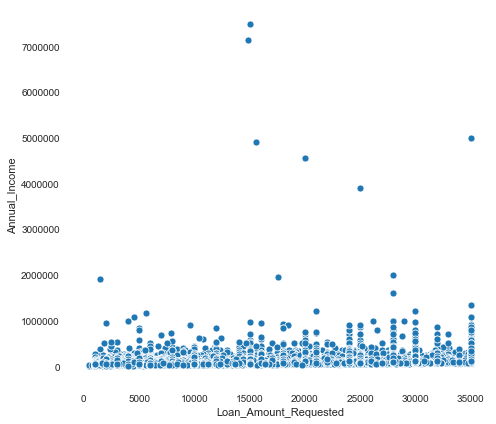

In [24]:
sns.relplot(x="Loan_Amount_Requested", y="Annual_Income",
            sizes=(20, 600), alpha=1, palette="magma", 
            height=6, data=train, aspect=14/12)

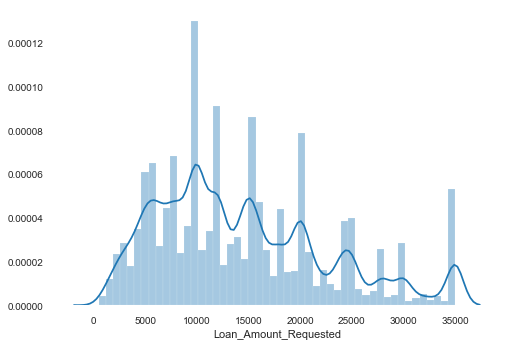

In [25]:
sns.distplot(train['Loan_Amount_Requested'])

Most of the customers have applied a loan for a amount between 10k and 25k and a higher nubmer of customers have applied for a loan of 10k

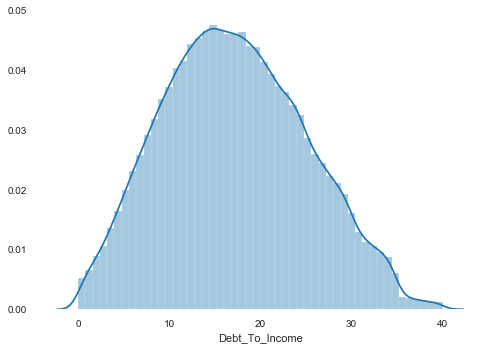

In [26]:
sns.distplot(train['Debt_To_Income'])

Here ,we can see a normal distribution of the curve of customers debt to income 

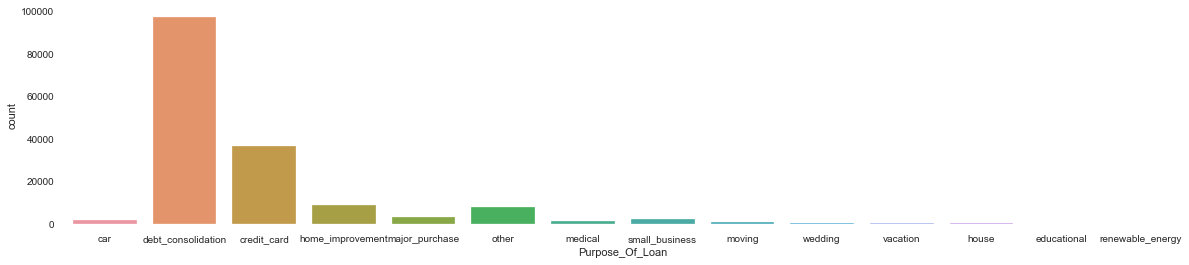

In [27]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(train['Purpose_Of_Loan'],ax=ax)

most of the customers have opted for laon for debt_consolidation and followed by credit card

In [28]:
train.head(1)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000.0,< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1


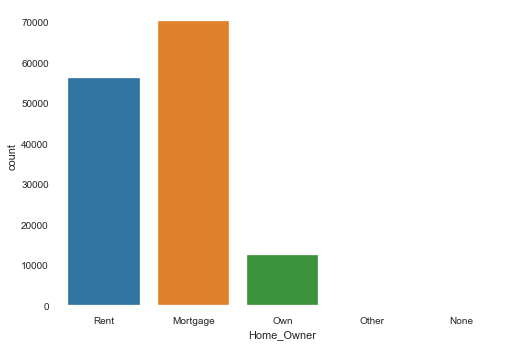

In [29]:
sns.countplot(train['Home_Owner'])

Here we can observe that most of the customers have thier properties mortgaged and rent ,there are very few customers who have thier own residences 

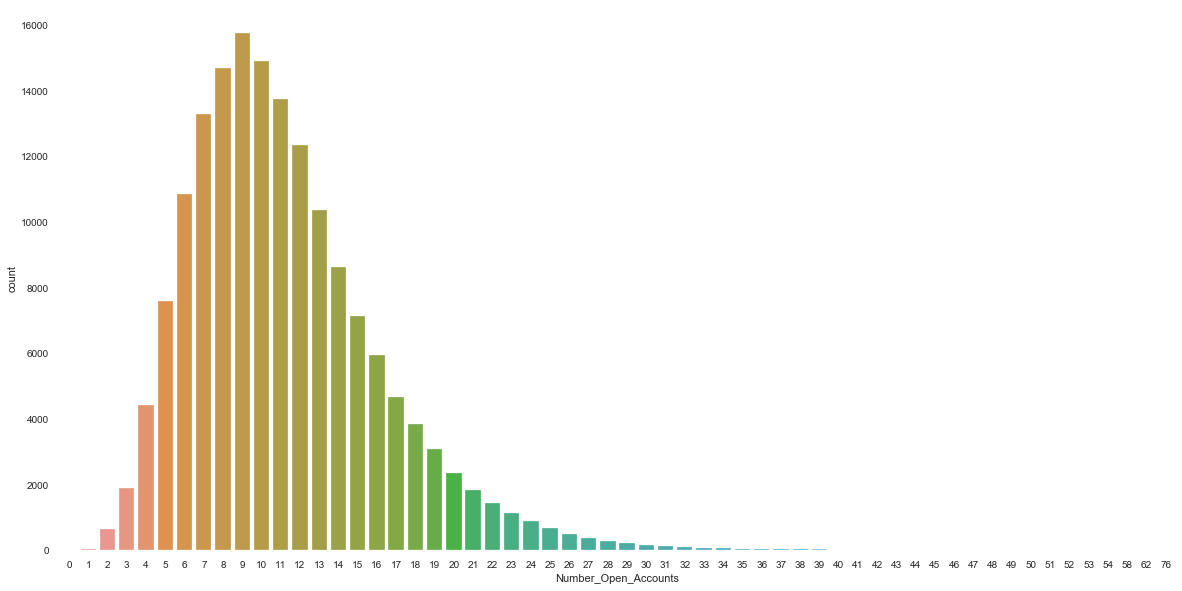

In [30]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(train['Number_Open_Accounts'])

Frequency of customers ,having higher number of accounts is high ,they may have large number of money pending in accounts.We see a slight skewness towards postive side in this graph .Few customers have more than 15 accounts.


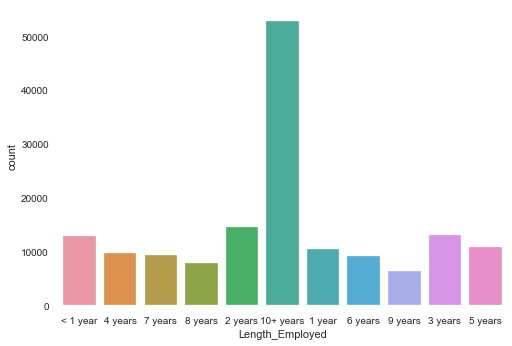

In [31]:
sns.countplot(train['Length_Employed'])

large number of employees have been there more than 10 years.So ,we can assume this bank has a customer base who are employed for a longer peroid of time.

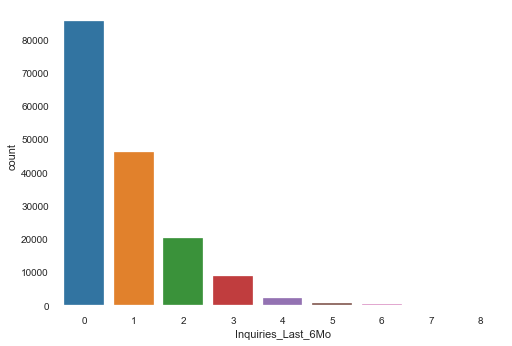

In [32]:
sns.countplot(train['Inquiries_Last_6Mo'])

# Now we will see Dependency among Variables

In [33]:
pd.crosstab(train['Length_Employed'],train['Interest_Rate'])/len(train)*100

Interest_Rate,1,2,3
Length_Employed,,,
1 year,1.378500,2.799603,2.164824
10+ years,6.448825,13.589639,12.166102
2 years,1.888515,3.909707,3.099648
3 years,1.730276,3.419776,2.746046
4 years,1.253127,2.604848,2.096659
5 years,1.368154,2.766738,2.446610
6 years,1.113147,2.354101,2.067446
7 years,1.077239,2.425308,2.162389
8 years,0.971949,2.110657,1.735754


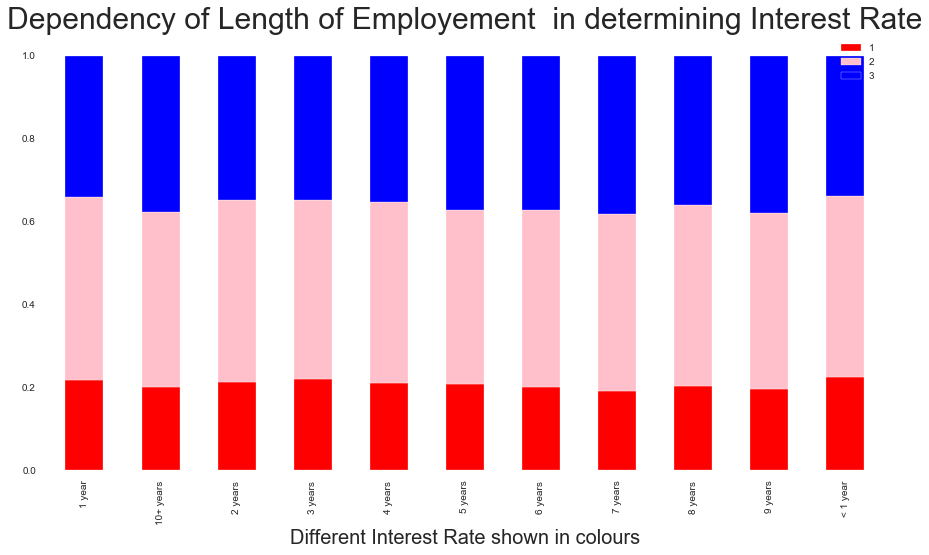

In [34]:
data = pd.crosstab(train['Length_Employed'],train['Interest_Rate'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 8), color = ['Red', 'Pink','Blue'])
plt.title('Dependency of Length of Employement  in determining Interest Rate', fontsize = 30)
plt.xlabel('Different Interest Rate shown in colours', fontsize = 20)
plt.legend()
plt.show()

Here ,we can observe that customers having higher experience usually greater than 5 years have been provided by interest 2 ands 3 

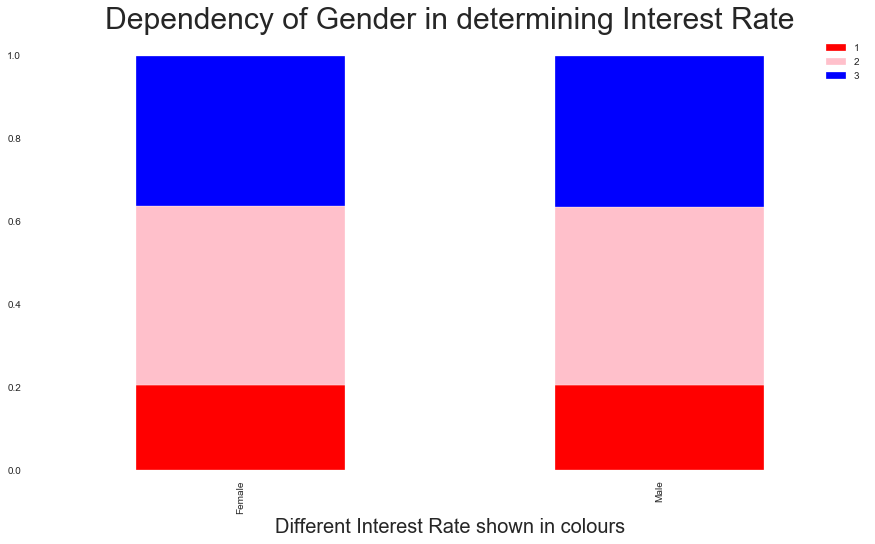

In [35]:
data = pd.crosstab(train['Gender'],train['Interest_Rate'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 8), color = ['Red', 'Pink','Blue'])
plt.title('Dependency of Gender in determining Interest Rate', fontsize = 30)
plt.xlabel('Different Interest Rate shown in colours', fontsize = 20)
plt.legend()
plt.show()

We see there is no biasness in determining the interest rate based on Gender.

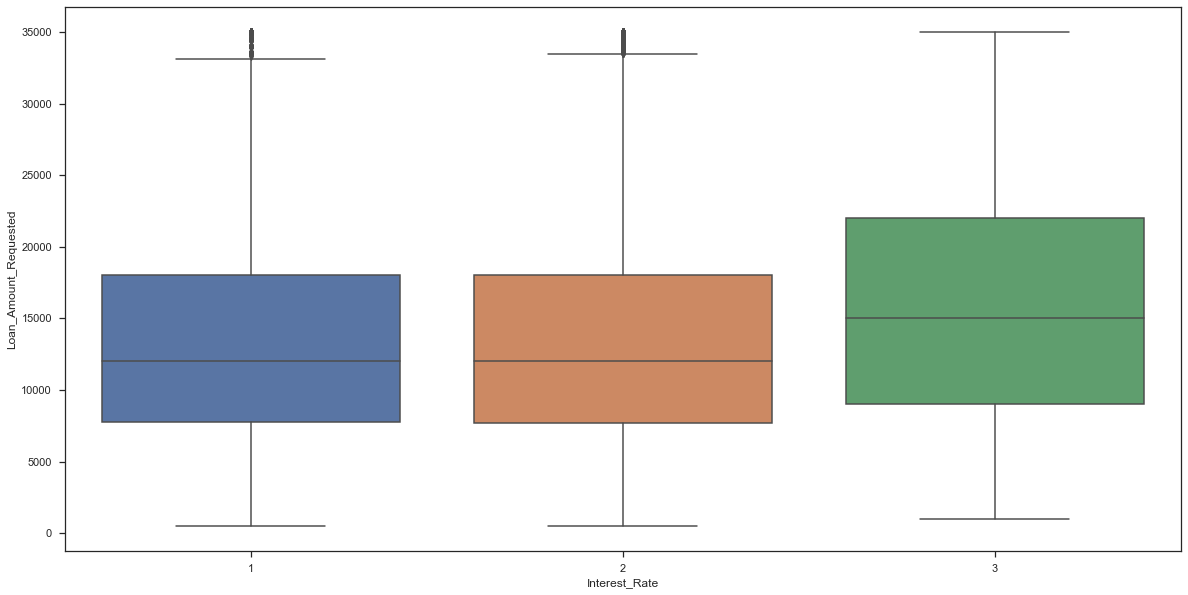

In [36]:
sns.set(style="ticks", color_codes=True)
a = sns.load_dataset("tips")
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="Interest_Rate", y="Loan_Amount_Requested", data=train);

Here,we can observe some outliers present in the data for customers having interest rate scheme of 1 and 2,customers having applied for larger amount  of would have fallen into 1 and 2 interest catogories.

In [37]:
pd.crosstab(train['Income_Verified'],train['Interest_Rate'])

Interest_Rate,1,2,3
Income_Verified,,,
VERIFIED - income,8568,22670,28183
VERIFIED - income source,10372,22913,19730
not verified,14866,24997,12010


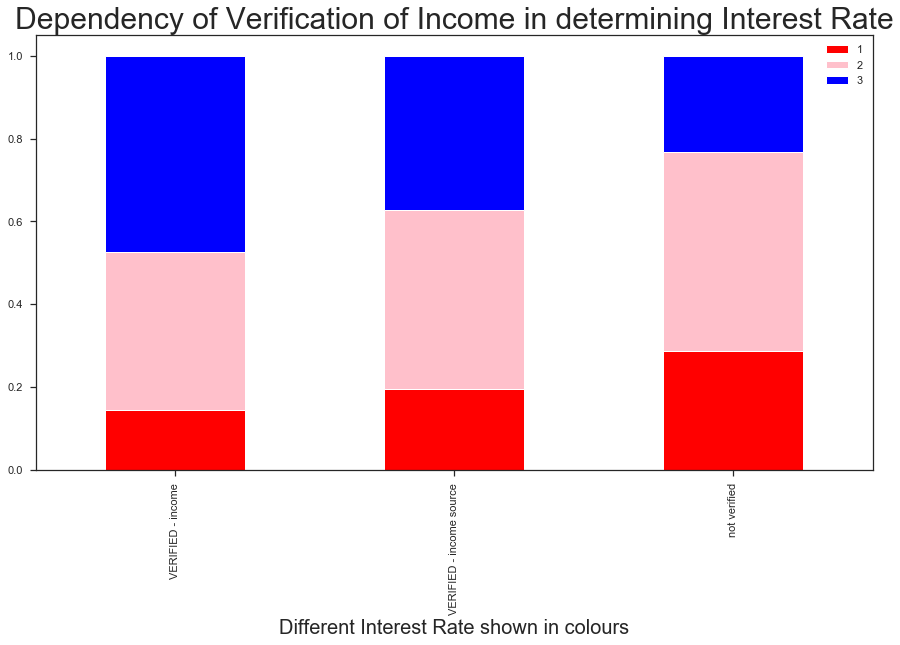

In [38]:
data = pd.crosstab(train['Income_Verified'],train['Interest_Rate'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 8), color = ['Red', 'Pink','Blue'])
plt.title('Dependency of Verification of Income in determining Interest Rate', fontsize = 30)
plt.xlabel('Different Interest Rate shown in colours', fontsize = 20)
plt.legend()
plt.show()

It can been seen clearly that customers having Income verfied been giving interest rate catogories 2 and 3 where not verified customers having have been tagged 1 ,we can interpret that  category  1 is the highest interest rate offered to customers

In [39]:
corr=train.corr()

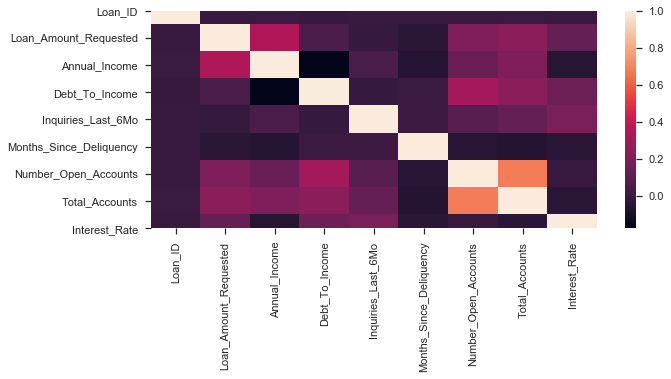

In [40]:
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corr)

Here we can observe ,very less correlation of variables  among each other 

In [41]:
train.head(3)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000.0,< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,30000.0,4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,24725.0,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3


In [42]:
train.isnull().sum()/len(train)

Loan_ID                    0.000000
Loan_Amount_Requested      0.000000
Length_Employed            0.044861
Home_Owner                 0.154276
Annual_Income              0.152773
Income_Verified            0.000000
Purpose_Of_Loan            0.000000
Debt_To_Income             0.000000
Inquiries_Last_6Mo         0.000000
Months_Since_Deliquency    0.537883
Number_Open_Accounts       0.000000
Total_Accounts             0.000000
Gender                     0.000000
Interest_Rate              0.000000
dtype: float64

In [43]:
test.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             4936
Home_Owner                 16711
Annual_Income              16898
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    58859
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
dtype: int64

In [44]:
a=test['Length_Employed'].mode()

In [46]:
train['Length_Employed'].fillna("10+ years",inplace=True)

In [47]:
test['Length_Employed'].fillna("10+ years",inplace=True)

In [48]:
train['Home_Owner'].mode()

0    Mortgage
dtype: object

In [49]:
train['Home_Owner'].fillna("Mortgage",inplace=True)

In [50]:
test['Home_Owner'].fillna("Mortgage",inplace=True)

In [51]:
train=train.drop(["Months_Since_Deliquency"],axis=1)  ##the percentage of missing values are very high ,more than 50 percent

In [52]:
test=test.drop(["Months_Since_Deliquency"],axis=1)

In [54]:
train['Annual_Income'].fillna(train['Annual_Income'].mean(),inplace=True) #the missing values were present in the higher income buckets ,so ,replacing it with mean.

73331.15943386468

In [55]:
test['Annual_Income'].fillna(test['Annual_Income'].mean(),inplace=True)

In [59]:
train.isnull().sum()

Loan_ID                  0
Loan_Amount_Requested    0
Length_Employed          0
Home_Owner               0
Annual_Income            0
Income_Verified          0
Purpose_Of_Loan          0
Debt_To_Income           0
Inquiries_Last_6Mo       0
Number_Open_Accounts     0
Total_Accounts           0
Gender                   0
Interest_Rate            0
dtype: int64

In [60]:
test.isnull().sum()

Loan_ID                  0
Loan_Amount_Requested    0
Length_Employed          0
Home_Owner               0
Annual_Income            0
Income_Verified          0
Purpose_Of_Loan          0
Debt_To_Income           0
Inquiries_Last_6Mo       0
Number_Open_Accounts     0
Total_Accounts           0
Gender                   0
dtype: int64

In [61]:
train=pd.get_dummies(train)

In [62]:
test=pd.get_dummies(test)

In [63]:
train.shape

(164309, 43)

In [64]:
test.shape

(109541, 42)

In [65]:
train=train.drop(['Loan_ID'],axis=1)
train.columns

In [67]:
Loan_idS = test['Loan_ID']
test = test.drop(['Loan_ID'], axis = 1)
test.columns

Index(['Loan_Amount_Requested', 'Annual_Income', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Number_Open_Accounts', 'Total_Accounts',
       'Length_Employed_1 year', 'Length_Employed_10+ years',
       'Length_Employed_2 years', 'Length_Employed_3 years',
       'Length_Employed_4 years', 'Length_Employed_5 years',
       'Length_Employed_6 years', 'Length_Employed_7 years',
       'Length_Employed_8 years', 'Length_Employed_9 years',
       'Length_Employed_< 1 year', 'Home_Owner_Mortgage', 'Home_Owner_None',
       'Home_Owner_Other', 'Home_Owner_Own', 'Home_Owner_Rent',
       'Income_Verified_VERIFIED - income',
       'Income_Verified_VERIFIED - income source',
       'Income_Verified_not verified', 'Purpose_Of_Loan_car',
       'Purpose_Of_Loan_credit_card', 'Purpose_Of_Loan_debt_consolidation',
       'Purpose_Of_Loan_educational', 'Purpose_Of_Loan_home_improvement',
       'Purpose_Of_Loan_house', 'Purpose_Of_Loan_major_purchase',
       'Purpose_Of_Loan_medical', 'Purpose

In [68]:
x_test=test
x_test.columns

In [70]:
# splitting the train set into dependent and independent sets

x=train.drop(['Interest_Rate'],axis=1) #independent variables

In [71]:
y=train['Interest_Rate']      #dependent variable

In [72]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (164309, 41)
Shape of y: (164309,)


In [73]:
y.value_counts()

2    70580
3    59923
1    33806
Name: Interest_Rate, dtype: int64

In [74]:
# splitting x and y into train and validation sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_valid.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_valid.shape)

Shape of x_train:  (131447, 41)
Shape of x_valid:  (32862, 41)
Shape of y_train:  (131447,)
Shape of y_valid:  (32862,)


In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

In [77]:
logis=LogisticRegression()
logis.fit(x_train,y_train)

C:\Users\50011443\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\50011443\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
print("Trianing Accuracy",logis.score(x_train,y_train))

Trianing Accuracy 0.4605049944083927


In [79]:
print("Validation Accuracy :", logis.score(x_valid, y_valid))

Validation Accuracy : 0.46305763495831054


In [80]:
logis_pred = logis.predict(x_test)


In [86]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [87]:
print("Trianing Accuracy",knn.score(x_train,y_train))

Trianing Accuracy 0.6078799820459957


In [88]:
print("Validation Accuracy :", knn.score(x_valid, y_valid))

Validation Accuracy : 0.4157081127137727


In [89]:
knn_pred=knn.predict(x_test)

In [91]:
a=pd.DataFrame(knn_pred)
b=pd.DataFrame(Loan_idS)
c=b.join(a)

In [109]:
c.columns=['Loan_ID','Interest_Rate']

In [111]:
c.Interest_Rate.value_counts()

2    59836
1    25470
3    24235
Name: Interest_Rate, dtype: int64

In [112]:
c.to_csv("Indranilsubmission.csv",index=False)

In [147]:
rfc=RandomForestClassifier(n_estimators=200,verbose=True)

In [160]:
rfc.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   44.6s finished


In [149]:
print('training Score',rfc.score(x_train,y_train))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


training Score 1.0


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    9.9s finished


In [150]:
print("Validation Accuracy :", knn.score(x_valid, y_valid))

Validation Accuracy : 0.4157081127137727


In [151]:
rfc_pred=rfc.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    7.9s finished


In [152]:
a=pd.DataFrame(rfc_pred)

In [153]:
c=b.join(a)

In [154]:
c.columns=['Loan_ID','Interest_Rate']

In [155]:
c.to_csv("Indranilsubmission4.csv",index=False)